<a href="https://colab.research.google.com/github/ishitasehgal14/Plant-Disease-Identification-using-CNN/blob/main/Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path='/content/drive/MyDrive/diseases.zip'

In [ ]:
extracted='/content/extracted'

In [ ]:
os.makedirs(extracted, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted)

In [ ]:
pip install split_folders

In [ ]:
import splitfolders

In [ ]:
input_folder='/content/extracted/PlantVillage'

In [ ]:
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/project',
                   seed=42,ratio=(.75,0.25))

Copying files: 20639 files [03:27, 99.40 files/s] 


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
img_width,img_height =256,256
input_shape=(3,img_width,img_height)
batch_size =32

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/project/train',
        target_size=(img_width,img_height),
        batch_size=batch_size,
       )

Found 15474 images belonging to 15 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/project/val',
        target_size=(img_width,img_height),
        batch_size=batch_size,
        shuffle=False,
        )

Found 5164 images belonging to 15 classes.


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

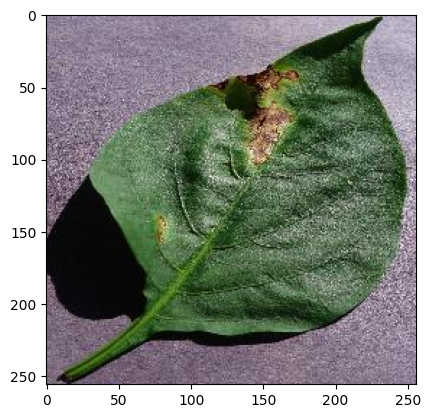

In [ ]:
img1 = image.load_img('/content/drive/MyDrive/project/train/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG', target_size=(256, 256))
plt.imshow(img1);

In [ ]:
img1 = image.load_img('/content/drive/MyDrive/project/train/Pepper__bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)
print(img)

[[[[0.54509807 0.49019608 0.5803922 ]
   [0.5529412  0.49803922 0.5882353 ]
   [0.5686275  0.5137255  0.6039216 ]
   ...
   [0.654902   0.62352943 0.7058824 ]
   [0.6666667  0.63529414 0.7176471 ]
   [0.6862745  0.654902   0.7372549 ]]

  [[0.57254905 0.5176471  0.60784316]
   [0.5921569  0.5372549  0.627451  ]
   [0.5686275  0.5137255  0.6039216 ]
   ...
   [0.75686276 0.7254902  0.80784315]
   [0.7372549  0.7058824  0.7882353 ]
   [0.6627451  0.6313726  0.7137255 ]]

  [[0.5529412  0.49803922 0.5882353 ]
   [0.6039216  0.54901963 0.6392157 ]
   [0.5647059  0.50980395 0.6       ]
   ...
   [0.7647059  0.73333335 0.8156863 ]
   [0.7411765  0.70980394 0.7921569 ]
   [0.62352943 0.5921569  0.6745098 ]]

  ...

  [[0.32156864 0.28627452 0.3529412 ]
   [0.31764707 0.28235295 0.34901962]
   [0.46666667 0.43529412 0.49411765]
   ...
   [0.5647059  0.5058824  0.5882353 ]
   [0.53333336 0.4745098  0.5568628 ]
   [0.41960785 0.36078432 0.44313726]]

  [[0.5176471  0.49019608 0.56078434]
   [0.6

In [ ]:
import keras
keras.backend.set_image_data_format('channels_last')

In [ ]:

from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
opt=SGD(lr=0.005,momentum=0.9 )

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model=tf.keras.models.Sequential()
model.add(ResNet50( include_top=False,
                   weights=None,
                   input_tensor=None,
                   input_shape=(256,256,3),
                   pooling=None))

In [ ]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [ ]:
model.add(Dropout(0.6))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=15,activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=['accuracy','mse'])

In [ ]:
model.input_shape

(None, 256, 256, 3)

In [ ]:
model.output_shape

(None, 15)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                        

In [ ]:
import keras
keras.backend.set_image_data_format('channels_last')

In [ ]:
tf.config.run_functions_eagerly(
  True
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=train_generator.samples// batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples// batch_size

    )


Epoch 1/25
483/483 [==============================] - 441s 913ms/step - loss: 1.8015 - accuracy: 0.4097 - mse: 0.0473 - val_loss: 1.3078 - val_accuracy: 0.5819 - val_mse: 0.0378
Epoch 2/25
483/483 [==============================] - 436s 902ms/step - loss: 1.1811 - accuracy: 0.6063 - mse: 0.0348 - val_loss: 3.0490 - val_accuracy: 0.3610 - val_mse: 0.0535
Epoch 3/25
483/483 [==============================] - 434s 898ms/step - loss: 0.9340 - accuracy: 0.6894 - mse: 0.0283 - val_loss: 1.2241 - val_accuracy: 0.6636 - val_mse: 0.0314
Epoch 4/25
483/483 [==============================] - 440s 910ms/step - loss: 0.7440 - accuracy: 0.7579 - mse: 0.0228 - val_loss: 0.5561 - val_accuracy: 0.8071 - val_mse: 0.0181
Epoch 5/25
483/483 [==============================] - 432s 893ms/step - loss: 0.6555 - accuracy: 0.7875 - mse: 0.0202 - val_loss: 0.9158 - val_accuracy: 0.7389 - val_mse: 0.0262
Epoch 6/25
483/483 [==============================] - 433s 895ms/step - loss: 0.5375 - accuracy: 0.8250 - mse:

In [ ]:
model.save('/content/drive/MyDrive/project/disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
target_names=[]
for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
import pickle

# Save target_names
with open('/content/drive/MyDrive/project/target_names.pkl', 'wb') as f:
    pickle.dump(target_names, f)



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
test_img=cv2.imread("/content/drive/MyDrive/project/train/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG")

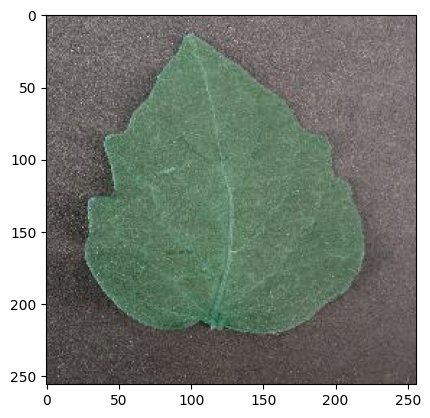

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
test_img = image.img_to_array(test_img)
test_img=test_img/255
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
predicted_probabilities = model.predict(test_input)
predicted_class_index = np.argmax(predicted_probabilities)
predicted_plant_name = target_names[predicted_class_index]
print("Predicted plant:", predicted_plant_name)

1/1 [==============================] - 0s 105ms/step
Predicted plant: Tomato_healthy
